In [1]:
!git clone https://github.com/Rohithmarktricks/eva8_codebase.git

Cloning into 'eva8_codebase'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 50 (delta 13), reused 43 (delta 9), pack-reused 0
Unpacking objects: 100% (50/50), 1.78 MiB | 8.48 MiB/s, done.


In [2]:
%cd /content/eva8_codebase

/content/eva8_codebase


In [3]:
!ls

main.py  models  __pycache__  README.md  utils


In [4]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=b41e781d0c897d4ee496049f4759d861ff3831cf42a5ce150e361985537ac223
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [5]:
from main import Trainer, get_criterion_for_classification, get_adam_optimizer
from models.resnet import ResNet18
from utils.data_utils import Cifar10Dataset, get_train_transforms, get_test_transforms, get_dataloader_args, load_data, get_device
from utils.plots import plot_stats, plot_imgs, model_summary, idx_to_class
from utils.grad_cam import get_cam, show_cam_on_image, plot_cam

In [6]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

In [7]:
device = get_device()
print(device)

cuda


In [8]:
dataloader_args = get_dataloader_args(batch_size=128)

In [9]:
print(dataloader_args)

{'shuffle': True, 'batch_size': 128, 'num_workers': 4, 'pin_memory': True}


In [10]:
train_transforms = get_train_transforms()
print(train_transforms)

Compose([
  RandomCrop(always_apply=False, p=1.0, height=32, width=32),
  Cutout(always_apply=False, p=1, num_holes=1, max_h_size=16, max_w_size=16),
  Normalize(always_apply=False, p=1.0, mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


In [11]:
test_transforms = get_test_transforms()
print(test_transforms)

Compose([
  Normalize(always_apply=False, p=1.0, mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


In [12]:
train_loader = load_data(train=True,
                         dataloader_args=dataloader_args,
                         transforms=train_transforms)

test_loader = load_data(train=False,
                        dataloader_args=dataloader_args,
                        transforms=test_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [13]:
model = ResNet18().to(device)

In [14]:
model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [15]:
criterion = get_criterion_for_classification()
optimizer = get_adam_optimizer(model, lr=0.001)
print(criterion, optimizer)

CrossEntropyLoss() Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)


In [16]:
trainer = Trainer(model, device, criterion, optimizer, batch_size=128)

In [17]:
epochs = 20

for epoch in range(epochs):
  print(f"Epoch: {epoch}")
  trainer.train(train_loader)
  trainer.test(test_loader)

Epoch: 0


 Loss=1.312723994255066 Batch_id=390 Accuracy=43.76: 100%|██████████| 391/391 [00:10<00:00, 36.59it/s]



Test set: Average loss: 0.0108, Accuracy: 5410/10000 (54.10%)

Epoch: 1


 Loss=1.026256799697876 Batch_id=390 Accuracy=61.36: 100%|██████████| 391/391 [00:09<00:00, 41.08it/s]



Test set: Average loss: 0.0076, Accuracy: 6704/10000 (67.04%)

Epoch: 2


 Loss=0.9139658212661743 Batch_id=390 Accuracy=69.12: 100%|██████████| 391/391 [00:09<00:00, 40.39it/s]



Test set: Average loss: 0.0060, Accuracy: 7385/10000 (73.85%)

Epoch: 3


 Loss=0.8577181100845337 Batch_id=390 Accuracy=73.82: 100%|██████████| 391/391 [00:09<00:00, 42.21it/s]



Test set: Average loss: 0.0050, Accuracy: 7852/10000 (78.52%)

Epoch: 4


 Loss=0.778190016746521 Batch_id=390 Accuracy=76.82: 100%|██████████| 391/391 [00:09<00:00, 40.69it/s]



Test set: Average loss: 0.0051, Accuracy: 7841/10000 (78.41%)

Epoch: 5


 Loss=0.6471050977706909 Batch_id=390 Accuracy=79.55: 100%|██████████| 391/391 [00:09<00:00, 41.42it/s]



Test set: Average loss: 0.0051, Accuracy: 7880/10000 (78.80%)

Epoch: 6


 Loss=0.3535439372062683 Batch_id=390 Accuracy=81.92: 100%|██████████| 391/391 [00:09<00:00, 40.78it/s]



Test set: Average loss: 0.0049, Accuracy: 8012/10000 (80.12%)

Epoch: 7


 Loss=0.45419448614120483 Batch_id=390 Accuracy=83.78: 100%|██████████| 391/391 [00:09<00:00, 40.39it/s]



Test set: Average loss: 0.0039, Accuracy: 8451/10000 (84.51%)

Epoch: 8


 Loss=0.29096391797065735 Batch_id=390 Accuracy=85.51: 100%|██████████| 391/391 [00:09<00:00, 40.77it/s]



Test set: Average loss: 0.0037, Accuracy: 8450/10000 (84.50%)

Epoch: 9


 Loss=0.330562949180603 Batch_id=390 Accuracy=87.22: 100%|██████████| 391/391 [00:09<00:00, 39.35it/s]



Test set: Average loss: 0.0038, Accuracy: 8404/10000 (84.04%)

Epoch: 10


 Loss=0.192952960729599 Batch_id=390 Accuracy=88.42: 100%|██████████| 391/391 [00:09<00:00, 40.71it/s]



Test set: Average loss: 0.0039, Accuracy: 8413/10000 (84.13%)

Epoch: 11


 Loss=0.4632284641265869 Batch_id=390 Accuracy=90.03: 100%|██████████| 391/391 [00:09<00:00, 40.46it/s]



Test set: Average loss: 0.0040, Accuracy: 8532/10000 (85.32%)

Epoch: 12


 Loss=0.14388705790042877 Batch_id=390 Accuracy=91.14: 100%|██████████| 391/391 [00:09<00:00, 40.59it/s]



Test set: Average loss: 0.0039, Accuracy: 8582/10000 (85.82%)

Epoch: 13


 Loss=0.32736510038375854 Batch_id=390 Accuracy=92.15: 100%|██████████| 391/391 [00:09<00:00, 39.99it/s]



Test set: Average loss: 0.0050, Accuracy: 8298/10000 (82.98%)

Epoch: 14


 Loss=0.08685078471899033 Batch_id=390 Accuracy=93.08: 100%|██████████| 391/391 [00:09<00:00, 40.96it/s]



Test set: Average loss: 0.0039, Accuracy: 8588/10000 (85.88%)

Epoch: 15


 Loss=0.11374463140964508 Batch_id=390 Accuracy=93.80: 100%|██████████| 391/391 [00:09<00:00, 40.49it/s]



Test set: Average loss: 0.0043, Accuracy: 8573/10000 (85.73%)

Epoch: 16


 Loss=0.1282021552324295 Batch_id=390 Accuracy=94.20: 100%|██████████| 391/391 [00:09<00:00, 41.19it/s]



Test set: Average loss: 0.0045, Accuracy: 8515/10000 (85.15%)

Epoch: 17


 Loss=0.16123245656490326 Batch_id=390 Accuracy=94.95: 100%|██████████| 391/391 [00:09<00:00, 41.00it/s]



Test set: Average loss: 0.0044, Accuracy: 8581/10000 (85.81%)

Epoch: 18


 Loss=0.0928918644785881 Batch_id=390 Accuracy=95.31: 100%|██████████| 391/391 [00:09<00:00, 40.63it/s]



Test set: Average loss: 0.0050, Accuracy: 8512/10000 (85.12%)

Epoch: 19


 Loss=0.10367634147405624 Batch_id=390 Accuracy=95.77: 100%|██████████| 391/391 [00:09<00:00, 40.11it/s]



Test set: Average loss: 0.0049, Accuracy: 8600/10000 (86.00%)



In [18]:
train_losses, train_acc = trainer.get_train_stats()
test_losses, test_acc = trainer.get_test_stats()

In [19]:
misclassified_imgs = trainer.get_misclassified_images(test_loader)

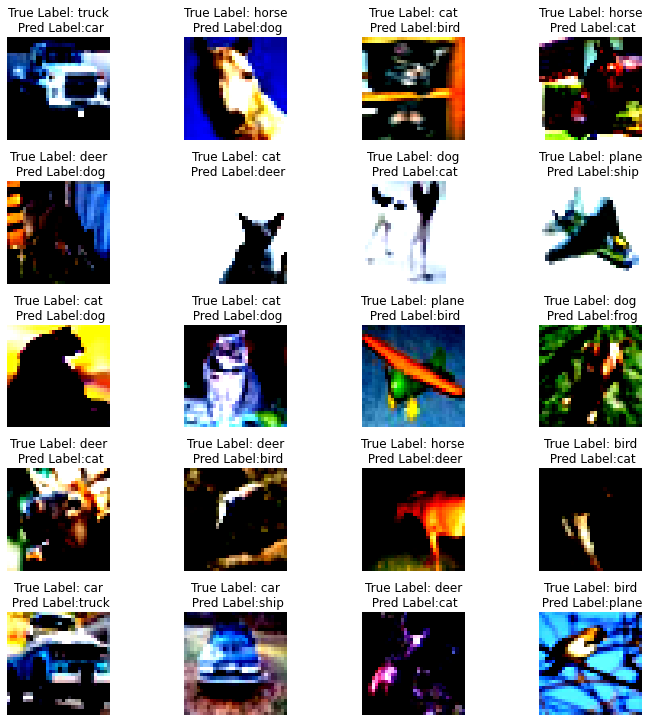

In [20]:
plot_imgs(misclassified_imgs)

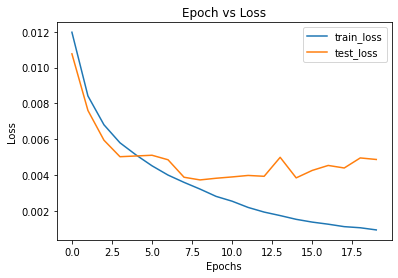

In [21]:
plot_stats(train_losses, test_losses, ['train_loss', 'test_loss'], xlabel='Epochs', ylabel='Loss', title="Epoch vs Loss")

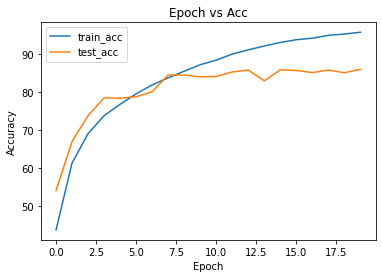

In [22]:
plot_stats(train_acc, test_acc, ['train_acc', 'test_acc'], xlabel='Epoch', ylabel="Accuracy", title="Epoch vs Acc")

In [23]:
keys_list = iter(list(misclassified_imgs.keys()))

In [24]:
target_layers = [model.layer2[1]]
cam = get_cam(model, target_layers, use_cuda = True)

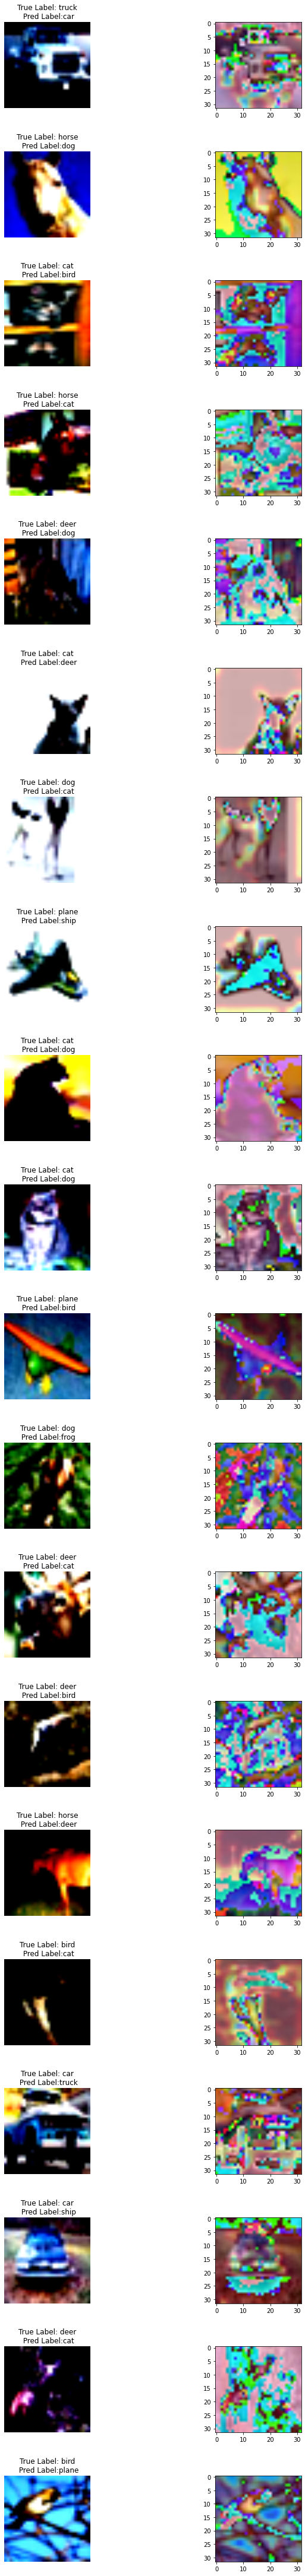

In [25]:
plot_cam(cam, misclassified_imgs, keys_list=keys_list)